<a href="https://colab.research.google.com/github/JSJeong-me/AI-Innovation-2024/blob/main/NLP/4-2-TF-IDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd # 데이터프레임 사용을 위해
from math import log # IDF 계산을 위해

docs = [
  '먹고 싶은 사과',
  '먹고 싶은 바나나',
  '길고 노란 바나나 바나나',
  '저는 과일이 좋아요'
]
vocab = list(set(w for doc in docs for w in doc.split()))
vocab.sort()


In [2]:
# 총 문서의 수
N = len(docs)

def tf(t, d):
  return d.count(t)

def idf(t):
  df = 0
  for doc in docs:
    df += t in doc
  return log(N/(df+1))

def tfidf(t, d):
  return tf(t,d)* idf(t)


In [3]:
result = []

# 각 문서에 대해서 아래 연산을 반복
for i in range(N):
  result.append([])
  d = docs[i]
  for j in range(len(vocab)):
    t = vocab[j]
    result[-1].append(tf(t, d))

tf_ = pd.DataFrame(result, columns = vocab)



In [4]:
tf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0,0,0,1,0,1,1,0,0
1,0,0,0,1,1,0,1,0,0
2,0,1,1,0,2,0,0,0,0
3,1,0,0,0,0,0,0,1,1


In [5]:
result = []
for j in range(len(vocab)):
    t = vocab[j]
    result.append(idf(t))

idf_ = pd.DataFrame(result, index=vocab, columns=["IDF"])
idf_


,IDF
과일이,0.693147
길고,0.693147
노란,0.693147
먹고,0.287682
바나나,0.287682
사과,0.693147
싶은,0.287682
저는,0.693147
좋아요,0.693147


In [6]:
result = []
for i in range(N):
  result.append([])
  d = docs[i]
  for j in range(len(vocab)):
    t = vocab[j]
    result[-1].append(tfidf(t,d))

tfidf_ = pd.DataFrame(result, columns = vocab)
tfidf_


,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0.000000,0.000000,0.000000,0.287682,0.000000,0.693147,0.287682,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.287682,0.287682,0.000000,0.287682,0.000000,0.000000
2,0.000000,0.693147,0.693147,0.000000,0.575364,0.000000,0.000000,0.000000,0.000000
3,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147


문서2에서는 바나나를 한 번 언급했지만, 문서3에서는 바나나를 두 번 언급했기 때문에 문서3에서의 바나나를 더욱 중요한 단어라고 판단

사이킷런을 이용한 DTM과 TF-IDF 실습

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 예제 문서들
documents = [
    "I love machine learning and natural language processing",
    "Machine learning is amazing and it is the future",
    "Natural language processing allows machines to understand human language"
]

# TF-IDF 계산
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(documents)

# TF-IDF 결과를 데이터프레임으로 표시
import pandas as pd
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
print(tfidf_df)


     allows  amazing       and  future     human        is      it  language  \
0  0.000000   0.0000  0.359700  0.0000  0.000000  0.000000  0.0000  0.359700   
1  0.000000   0.3205  0.243748  0.3205  0.000000  0.640999  0.3205  0.000000   
2  0.343596   0.0000  0.000000  0.0000  0.343596  0.000000  0.0000  0.522627   

   learning      love   machine  machines   natural  processing     the  \
0  0.359700  0.472963  0.359700  0.000000  0.359700    0.359700  0.0000   
1  0.243748  0.000000  0.243748  0.000000  0.000000    0.000000  0.3205   
2  0.000000  0.000000  0.000000  0.343596  0.261314    0.261314  0.0000   

         to  understand  
0  0.000000    0.000000  
1  0.000000    0.000000  
2  0.343596    0.343596  


       idf는        tf     강조합니다      계산하는       다양한       단어를       단어의  \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1  0.292946  0.292946  0.000000  0.371565  0.000000  0.000000  0.371565   
2  0.000000  0.000000  0.000000  0.000000  0.421765  0.000000  0.000000   
3  0.246340  0.246340  0.312451  0.000000  0.000000  0.312451  0.000000   

      등장하지만        모든       문서에  ...        않은        위해     인공지능의       자연어  \
0  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.525473  0.414289   
1  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
2  0.000000  0.000000  0.000000  ...  0.000000  0.421765  0.000000  0.332524   
3  0.312451  0.312451  0.312451  ...  0.312451  0.000000  0.000000  0.000000   

         자주      중요도를       처리는       처리를        특정       흔하지  
0  0.000000  0.000000  0.525473  0.000000  0.000000  0.000000  
1  0.000000  0.371565  0.000000  0.000000  0.371565  0.000000  
2  0.000000  0.000000  0.000000

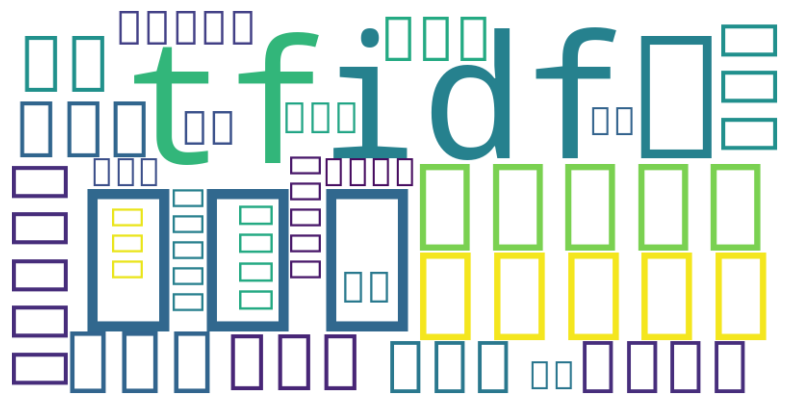

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 한글 문서 예제
documents = [
    "자연어 처리는 인공지능의 한 분야입니다.",
    "TF-IDF는 문서의 특정 단어의 중요도를 계산하는 방법입니다.",
    "자연어 처리를 위해 다양한 방법이 사용됩니다.",
    "TF-IDF는 문서에서 자주 등장하지만 모든 문서에 흔하지 않은 단어를 강조합니다."
]

# TF-IDF 계산
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(documents)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# 데이터프레임 표시
# 'ace_tools' is not a standard library and is likely unavailable.
# Use the following line to display the dataframe
print(tfidf_df)

# 워드클라우드 생성 (단어별 가중치를 활용)
word_weights = tfidf_df.sum(axis=0).to_dict()
wordcloud = WordCloud(font_path=None, background_color='white', width=800, height=400).generate_from_frequencies(word_weights)

# 워드클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
!apt-get update -qq   # 폰트 설정을 위한 코드
!apt-get install fonts-nanum* -qq

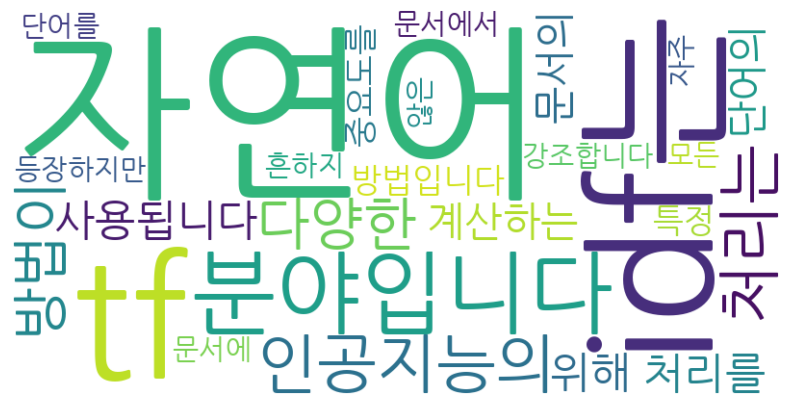

In [ ]:
import os
import urllib.request

# 나눔고딕 폰트 다운로드 경로 및 저장 경로 설정
# font_url = "https://github.com/naver/nanumfont/raw/master/NanumGothic.ttf" # Updated URL to the raw file
# font_path = "/mnt/data/NanumGothic.ttf"

# 나눔고딕 폰트 다운로드
# if not os.path.exists(font_path):
#     urllib.request.urlretrieve(font_url, font_path)

# 워드클라우드 생성 (단어별 가중치를 활용) - 한글 폰트 추가
wordcloud = WordCloud(font_path=font_path, background_color='white', width=800, height=400).generate_from_frequencies(word_weights)

# 워드클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()